In [200]:
import yfinance as yf

In [201]:
df_apple = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [202]:
df_apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [203]:
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt

%matplotlib inline

In [204]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11038 entries, 1980-12-12 to 2024-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11038 non-null  float64
 1   High       11038 non-null  float64
 2   Low        11038 non-null  float64
 3   Close      11038 non-null  float64
 4   Adj Close  11038 non-null  float64
 5   Volume     11038 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 603.6 KB


In [205]:
target_df = df_apple

In [206]:
col = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target_df.drop(columns=col, inplace=True)

In [207]:
target_df.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [208]:
target_df.isnull().sum()

Close    0
dtype: int64

<Axes: xlabel='Date'>

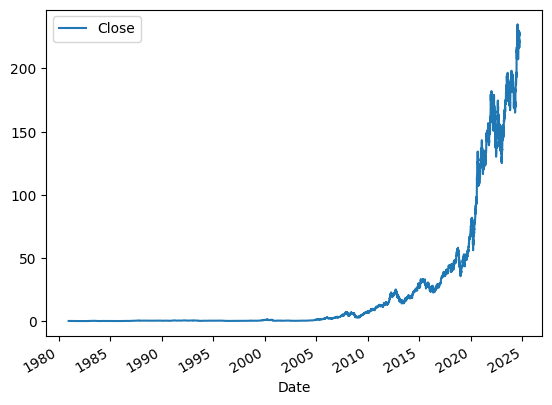

In [209]:
target_df.plot()

In [210]:
from statsmodels.tsa.stattools import adfuller

In [211]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [212]:
adf_test(target_df)

ADF Statistics: 3.846621560724662
p- value: 1.0
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [213]:
target_df['Close First Difference'] = target_df['Close'] - target_df['Close'].shift(1)

In [214]:
target_df.head()

,Close,Close First Difference
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.006696
1980-12-16,0.112723,-0.008929
1980-12-17,0.115513,0.002790
1980-12-18,0.118862,0.003349


In [215]:
adf_test(target_df['Close First Difference'].dropna())

ADF Statistics: -17.68897984501599
p- value: 3.579470887476841e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [216]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

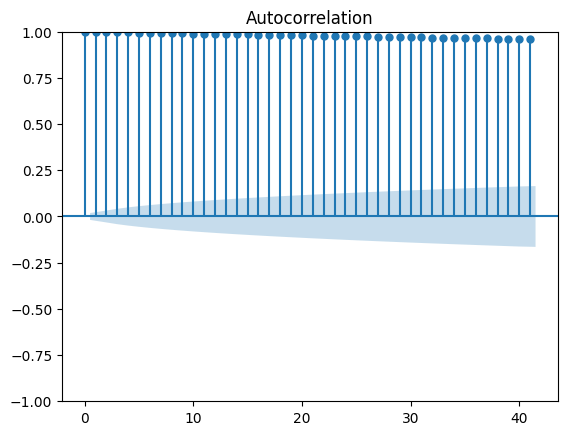

In [217]:
acf = plot_acf(target_df["Close"])

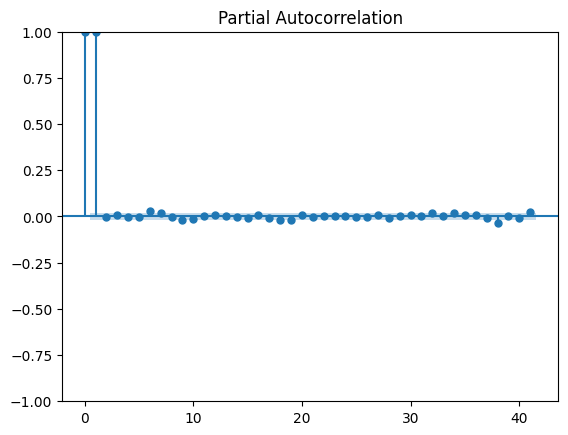

In [218]:
pacf = plot_pacf(target_df['Close'])

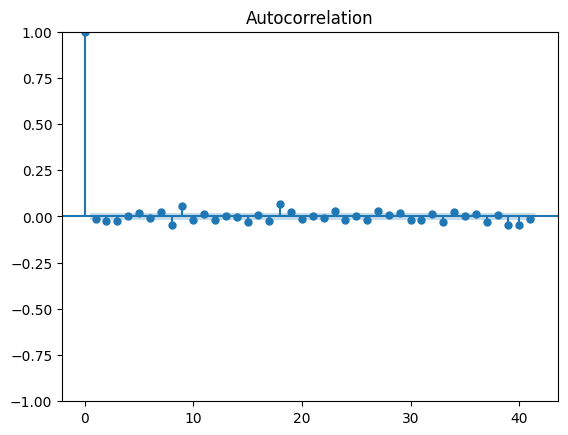

In [219]:
acf = plot_acf(target_df['Close First Difference'].dropna())

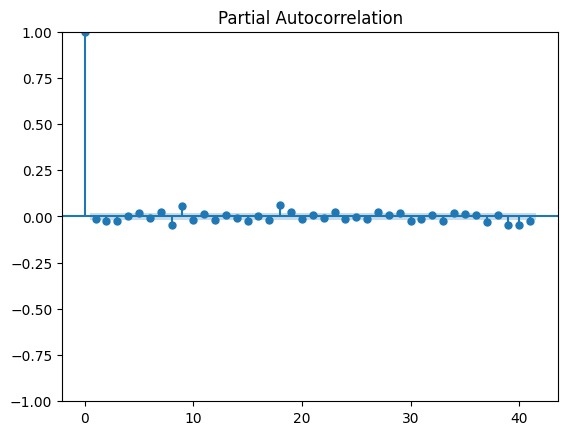

In [220]:
pacf = plot_pacf(target_df['Close First Difference'].dropna())

In [221]:
target_df['Close Twelve Difference'] = target_df['Close'] - target_df['Close'].shift(12)

In [222]:
target_df.head(20)

,Close,Close First Difference,Close Twelve Difference
Date,,,
1980-12-12,0.128348,NaN,NaN
1980-12-15,0.121652,-0.006696,NaN
1980-12-16,0.112723,-0.008929,NaN
1980-12-17,0.115513,0.002790,NaN
1980-12-18,0.118862,0.003349,NaN
1980-12-19,0.126116,0.007254,NaN
1980-12-22,0.132254,0.006138,NaN
1980-12-23,0.137835,0.005581,NaN
1980-12-24,0.145089,0.007254,NaN


In [223]:
target_df.tail()

,Close,Close First Difference,Close Twelve Difference
Date,,,
2024-09-19,228.869995,8.179993,6.099991
2024-09-20,228.199997,-0.669998,7.349991
2024-09-23,226.470001,-1.729996,4.089996
2024-09-24,227.369995,0.899994,6.549988
2024-09-25,226.369995,-1.000000,5.459991


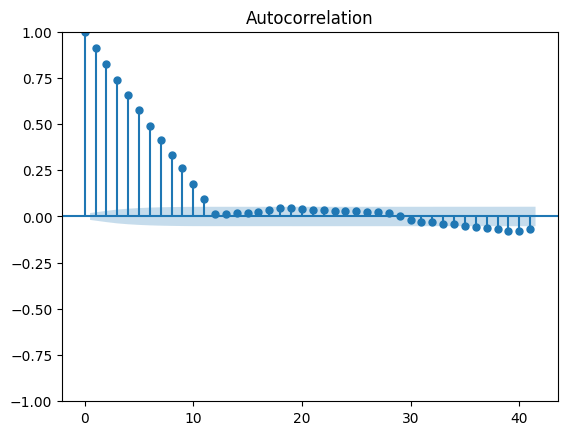

In [224]:
acf = plot_acf(target_df['Close Twelve Difference'].dropna())

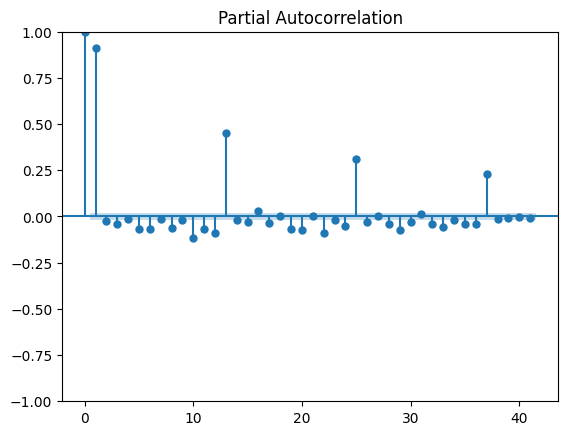

In [225]:
pacf = plot_pacf(target_df['Close Twelve Difference'].dropna())

In [288]:
# Split the data into training and testing sets
train_size = int(len(target_df) * 0.8)
train, test = target_df['Close'][:train_size], target_df['Close'][train_size:]

In [291]:
from statsmodels.tsa.arima.model import ARIMA

In [295]:
# Fit the model on training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


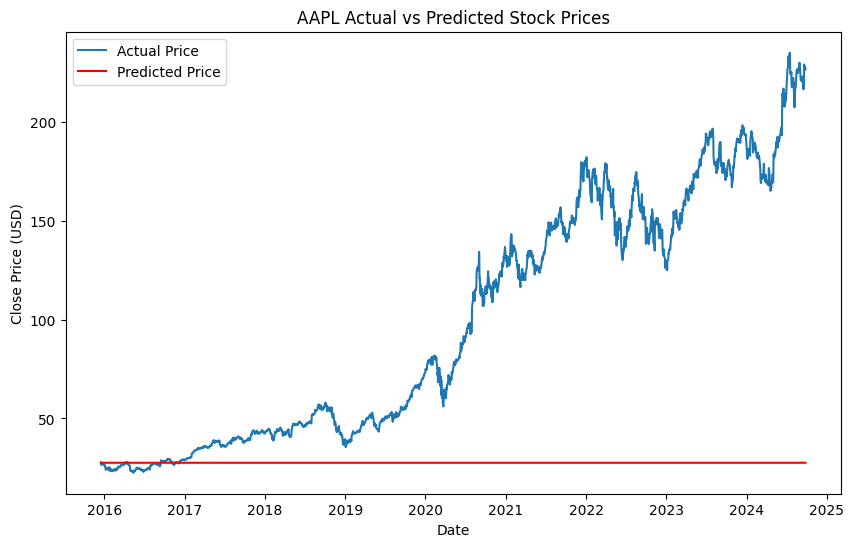

In [296]:
# Forecast for the test data
forecast = model_fit.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title('AAPL Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [300]:
forecast

8830     27.622267
8831     27.622221
8832     27.622212
8833     27.622210
8834     27.622210
           ...    
11033    27.622210
11034    27.622210
11035    27.622210
11036    27.622210
11037    27.622210
Name: predicted_mean, Length: 2208, dtype: float64

In [297]:
residuals=test-forecast

In [298]:
residuals

2015-12-16 00:00:00   NaN
2015-12-17 00:00:00   NaN
2015-12-18 00:00:00   NaN
2015-12-21 00:00:00   NaN
2015-12-22 00:00:00   NaN
                       ..
11033                 NaN
11034                 NaN
11035                 NaN
11036                 NaN
11037                 NaN
Length: 4416, dtype: float64

<Axes: ylabel='Density'>

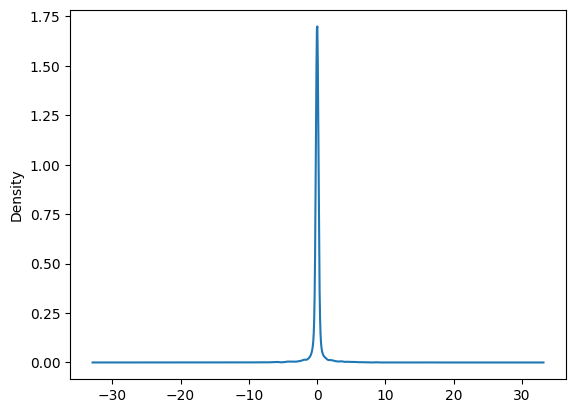

In [299]:
model_Arima_fit.resid.plot(kind='kde')

In [301]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [302]:
model_SARIMA=SARIMAX(train, order=(1,0,1),seasonal_order=(0,1,0,12))

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [303]:
model_SARIMA_fit=model_SARIMA.fit()

In [304]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 8830
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                1940.863
Date:                             Thu, 26 Sep 2024   AIC                          -3875.725
Time:                                     16:36:04   BIC                          -3854.471
Sample:                                          0   HQIC                         -3868.486
                                            - 8830                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8953      0.002    449.961      0.000       0.891       0.899
ma.L1          0.0789      0.004     19.323      0.000       0.071       0.087
sigma2         0.0377      0.000    248.435      0.000       0.037       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            261074.80
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):             893.40   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [306]:
# Forecast for the test data
forecast = model_SARIMA_fit.forecast(steps=len(test))

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [307]:
forecast

8830     27.890467
8831     27.826920
8832     27.719892
8833     27.591315
8834     28.675425
           ...    
11033    27.848585
11034    28.096743
11035    27.448312
11036    27.362003
11037    26.943902
Name: predicted_mean, Length: 2208, dtype: float64

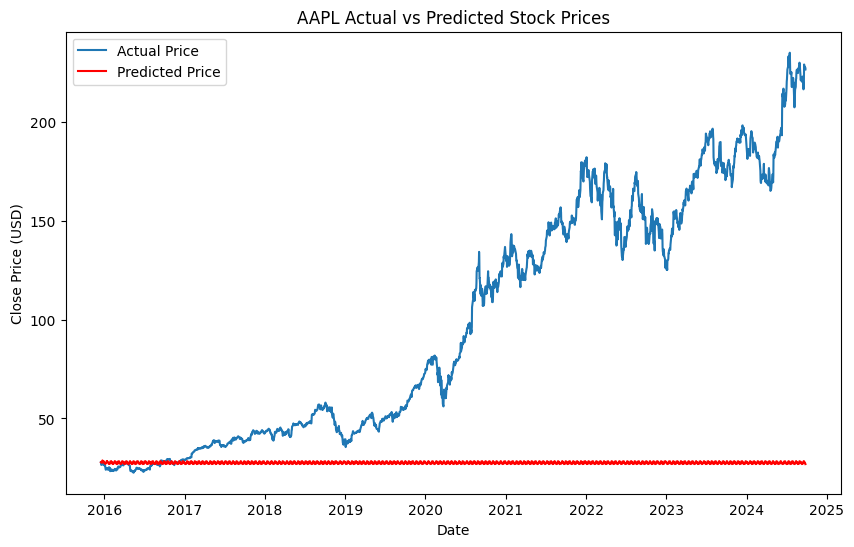

In [308]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title('AAPL Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [305]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2022,12,12),end=datetime(2023,12,1))

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [309]:
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'

: 